# Analysis of HTTP Request Logs from an Intrusion Detection System

## Log File Analysis

By 
### Ameenah Al-Haidari

#### Date: April, 2024

### Prerequisite
If you are developing your code in your local machine, download and unzip the files from this link:
https://web.cs.dal.ca/~kuzniar/a2_files/part2.log

For this part you will need to analyze the provided logfile part2.log. This is a log file that records HTTP requests recorded by an Intrusion Detection System (IDS). The log file contains many fields, and in this question the file is pre-processed so that only 10 columns remained:

To analyze this logfile, perform the following steps:
1. Open the log file such that only a single line at a time is loaded into memory. [2]
2. Parse the log file and record the fields highlighted above. [10]
3. Create a datetime object to record the date. [4]
4. Find and print the three most commonly seen “host”. [8]
5. Briefly describe these hosts as a comment in your program/notebook. One or two sentences for each is
sufficient. [6]
6. Create a plot that shows these three common hosts throughout the record. [10]


### Libraries

In [109]:
import pandas as pd
from datetime import datetime
from collections import Counter
import matplotlib.pyplot as plt

### <span style='color:red'> The Solution </span>

### 1. Open the log file such that only a single line at a time is loaded into memory. [2]

In [38]:
def openLogFile(path):
    with open(path) as log_file:
        for log_entry in log_file:
            yield log_entry

In [39]:
log_file = openLogFile("part2.log.txt")
print(type(log_file))
print(next(log_file))
print(next(log_file))
print(next(log_file))

<class 'generator'>
2022-08-05 10:07:55.355	Cy1cVd4x3KZVEB2km2	192.168.253.154	49704	34.107.221.82	80	1	GET	detectportal.firefox.com	/canonical.html

2022-08-05 10:07:55.634	CT2TVs3rcSojYIobYi	192.168.253.154	49706	34.107.221.82	80	1	GET	detectportal.firefox.com	/success.txt?ipv4

2022-08-05 10:07:55.727	CEpVQS1XCpVcTC9BQc	192.168.253.154	49707	23.202.229.179	80	1	POST	r3.o.lencr.org	/



#### To read all file

In [40]:
def process_log_file(file_path):
    with open(file_path, 'r') as file:
        for line in file:
            # Process each line here
            print(line)  # Example: print the line

# Usage
file_path = 'part2.log.txt'
process_log_file(file_path)

2022-08-05 10:07:55.355	Cy1cVd4x3KZVEB2km2	192.168.253.154	49704	34.107.221.82	80	1	GET	detectportal.firefox.com	/canonical.html

2022-08-05 10:07:55.634	CT2TVs3rcSojYIobYi	192.168.253.154	49706	34.107.221.82	80	1	GET	detectportal.firefox.com	/success.txt?ipv4

2022-08-05 10:07:55.727	CEpVQS1XCpVcTC9BQc	192.168.253.154	49707	23.202.229.179	80	1	POST	r3.o.lencr.org	/

2022-08-05 10:07:55.974	CsocPy3r3rQzZgSHpj	192.168.253.154	49711	93.184.220.29	80	1	POST	ocsp.digicert.com	/

2022-08-05 10:07:55.979	CGlOLDVPi7YMAORDc	192.168.253.154	49713	93.184.220.29	80	1	POST	ocsp.digicert.com	/

2022-08-05 10:07:55.979	C5dFO23vPEG9FmJmvl	192.168.253.154	49712	93.184.220.29	80	1	POST	ocsp.digicert.com	/

2022-08-05 10:07:56.364	CsocPy3r3rQzZgSHpj	192.168.253.154	49711	93.184.220.29	80	2	POST	ocsp.digicert.com	/

2022-08-05 10:07:59.279	Ci5tf73Quz0D7H6xs	192.168.253.154	49729	142.250.184.227	80	1	POST	ocsp.pki.goog	/gts1c3

2022-08-05 10:07:59.280	C2lmOb18U9B6o8pqrd	192.168.253.154	49728	142.250.184.2

### 2. Parse the log file and record the fields highlighted above. [10]

In [41]:
def parse_log_file_v3(file_path):
    parsed_data = []  # List to store the parsed records

    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split('\t')  # Splitting by tab character
            if len(parts) < 10:
                continue  # Skip lines that don't have enough parts

            # Extract desired fields based on their position in the line
            timestamp = parts[0]
            session_id = parts[1]
            source_ip = parts[2]
            source_port = parts[3]
            dest_ip = parts[4]
            dest_port = parts[5]
            Dep_transaction = parts[6]
            method = parts[7]
            host = parts[8]
            url = parts[9]

            # Create a dictionary for the current line and add it to the result list
            record = {
                "timestamp": timestamp,
                "session_id": session_id,
                "source_ip": source_ip,
                "source_port": source_port,
                "dest_ip": dest_ip,
                "dest_port": dest_port,
                "Dep_transaction": Dep_transaction,
                "method": method,
                "host": host,
                "url": url
            }
            parsed_data.append(record)

    return parsed_data

# Re-parsing the uploaded log file with the corrected function
parsed_data_v3 = parse_log_file_v3(file_path)
parsed_data_v3[:5]  # Show the first 5 records to check the parsed data

[{'timestamp': '2022-08-05 10:07:55.355',
  'session_id': 'Cy1cVd4x3KZVEB2km2',
  'source_ip': '192.168.253.154',
  'source_port': '49704',
  'dest_ip': '34.107.221.82',
  'dest_port': '80',
  'Dep_transaction': '1',
  'method': 'GET',
  'host': 'detectportal.firefox.com',
  'url': '/canonical.html'},
 {'timestamp': '2022-08-05 10:07:55.634',
  'session_id': 'CT2TVs3rcSojYIobYi',
  'source_ip': '192.168.253.154',
  'source_port': '49706',
  'dest_ip': '34.107.221.82',
  'dest_port': '80',
  'Dep_transaction': '1',
  'method': 'GET',
  'host': 'detectportal.firefox.com',
  'url': '/success.txt?ipv4'},
 {'timestamp': '2022-08-05 10:07:55.727',
  'session_id': 'CEpVQS1XCpVcTC9BQc',
  'source_ip': '192.168.253.154',
  'source_port': '49707',
  'dest_ip': '23.202.229.179',
  'dest_port': '80',
  'Dep_transaction': '1',
  'method': 'POST',
  'host': 'r3.o.lencr.org',
  'url': '/'},
 {'timestamp': '2022-08-05 10:07:55.974',
  'session_id': 'CsocPy3r3rQzZgSHpj',
  'source_ip': '192.168.253.154

In [42]:
import pandas as pd

# Convert the list of dictionaries into a DataFrame
df = pd.DataFrame(parsed_data_v3)

# Display the first few rows of the DataFrame to verify
#print(df.head())
df

,timestamp,session_id,source_ip,source_port,dest_ip,dest_port,Dep_transaction,method,host,url
0,2022-08-05 10:07:55.355,Cy1cVd4x3KZVEB2km2,192.168.253.154,49704,34.107.221.82,80,1,GET,detectportal.firefox.com,/canonical.html
1,2022-08-05 10:07:55.634,CT2TVs3rcSojYIobYi,192.168.253.154,49706,34.107.221.82,80,1,GET,detectportal.firefox.com,/success.txt?ipv4
2,2022-08-05 10:07:55.727,CEpVQS1XCpVcTC9BQc,192.168.253.154,49707,23.202.229.179,80,1,POST,r3.o.lencr.org,/
3,2022-08-05 10:07:55.974,CsocPy3r3rQzZgSHpj,192.168.253.154,49711,93.184.220.29,80,1,POST,ocsp.digicert.com,/
4,2022-08-05 10:07:55.979,CGlOLDVPi7YMAORDc,192.168.253.154,49713,93.184.220.29,80,1,POST,ocsp.digicert.com,/
...,...,...,...,...,...,...,...,...,...,...
513,2022-08-05 10:28:16.164,CskwvL3RzrO9JfYdhg,192.168.253.154,51264,192.168.253.166,443,197,GET,c2.globonamtics.com,/rVwgroiNASsJOQg4a9QfpAot7JoXz6--L3OfnaEdTnXQ4...
514,2022-08-05 10:28:26.178,CskwvL3RzrO9JfYdhg,192.168.253.154,51264,192.168.253.166,443,198,GET,c2.globonamtics.com,/rVwgroiNASsJOQg4a9QfpAot7JoXz6--L3OfnaEdTnXQ4...
515,2022-08-05 10:28:36.186,CskwvL3RzrO9JfYdhg,192.168.253.154,51264,192.168.253.166,443,199,GET,c2.globonamtics.com,/rVwgroiNASsJOQg4a9QfpAot7JoXz6--L3OfnaEdTnXQ4...
516,2022-08-05 10:28:46.194,CskwvL3RzrO9JfYdhg,192.168.253.154,51264,192.168.253.166,443,200,GET,c2.globonamtics.com,/rVwgroiNASsJOQg4a9QfpAot7JoXz6--L3OfnaEdTnXQ4...


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   timestamp        518 non-null    object
 1   session_id       518 non-null    object
 2   source_ip        518 non-null    object
 3   source_port      518 non-null    object
 4   dest_ip          518 non-null    object
 5   dest_port        518 non-null    object
 6   Dep_transaction  518 non-null    object
 7   method           518 non-null    object
 8   host             518 non-null    object
 9   url              518 non-null    object
dtypes: object(10)
memory usage: 40.6+ KB


### 3. Create a datetime object to record the date. [4]

In [49]:
from datetime import datetime

# Open the log file and process it line by line
with open(file_path, 'r') as file:
    for line in file:
        # Split the line based on tabs to extract fields
        parts = line.strip().split('\t')
        if len(parts) == 10:
            # Extract the timestamp string from the line
            timestamp_str = parts[0]
            
            print(timestamp_str)
            print(type(timestamp_str))
            
            # Convert the timestamp string to a datetime object
            timestamp = datetime.strptime(timestamp_str, '%Y-%m-%d %H:%M:%S.%f')
            
            # Output the datetime object to demonstrate
            print(f"Datetime object: {timestamp}")

            # Convert the formatted date string to a datetime object
            print(type(timestamp))
            
            # Break after the first line to demonstrate the conversion
            break



2022-08-05 10:07:55.355
<class 'str'>
Datetime object: 2022-08-05 10:07:55.355000
<class 'datetime.datetime'>


### 4. Find and print the three most commonly seen “host”. [8]

In [52]:
from collections import Counter

# Assuming parsed_data_v3 is your parsed log data
# parsed_data_v3 = [...]

# Extract the host values from each record
hosts = [record['host'] for record in parsed_data_v3]

# Count the occurrences of each host
host_counts = Counter(hosts)

# Find the three most common hosts
top_three_hosts = host_counts.most_common(3)

# Print the three most commonly seen hosts
print("The three most commonly seen hosts are:")
for host, count in top_three_hosts:
    print(f"{host}: {count} times")


The three most commonly seen hosts are:
c2.globonamtics.com: 202 times
ocsp.digicert.com: 84 times
ocsp.sca1b.amazontrust.com: 67 times


#### Printing as a table with the similarity

In [107]:
from collections import Counter
from difflib import SequenceMatcher
from operator import itemgetter

def getCommonHosts(parsed_data, similar_domain="example.com"):
    hosts = [record['host'] for record in parsed_data]
    host_counts = Counter(hosts)
    most_common_hosts = host_counts.most_common(3)

    host_anomalies = []
    for host in most_common_hosts:
        anomaly = {
            "host": host[0],
            "occurrence": host[1],
            "similarity": round(SequenceMatcher(None, host[0], similar_domain).ratio() * 100)
        }
        host_anomalies.append(anomaly)

    # Sort by occurrence, then by similarity if you want
    host_anomalies.sort(key=itemgetter("occurrence", "similarity"), reverse=True)

    return host_anomalies

def printCommonHosts(parsed_data):
    hosts = getCommonHosts(parsed_data)
    # Increase the space for "Occurrence" by adjusting the number in the format specifier
    print("{:30}\t{:10}\t{}".format("Host", "Occurrence", "Similarity"))
    print("-" * 80)  # Adjust the separator length accordingly
    for host in hosts:
        # Here too, increase the space for the "Occurrence" column
        print("{:30}\t{:10}\t{}".format(host['host'], host['occurrence'], host['similarity']))



In [108]:
printCommonHosts(parsed_data_v3)

Host                          	Occurrence	Similarity
--------------------------------------------------------------------------------
c2.globonamtics.com           	       202	40
ocsp.digicert.com             	        84	43
ocsp.sca1b.amazontrust.com    	        67	32


### 5. Briefly describe these hosts as a comment in your program/notebook. One or two sentences for each is sufficient. [6]

### <span style="color:chocolate"> 1. c2.globonamtics.com: 202 times </span>
This domain suggests a command and control (C2) server for the globonamtics.com entity, which might be a simulated or generic domain used in cybersecurity exercises or demonstrations. C2 servers are crucial in cyber-attack scenarios, as they manage the network of compromised machines or distribute malicious commands and updates.

### <span style="color:chocolate"> 2. ocsp.digicert.com: 84 times </span>
This host is associated with DigiCert's OCSP service. DigiCert is a major provider of SSL and TLS certificates, and ocsp.digicert.com is used to perform real-time verification of the revocation status of digital certificates issued by DigiCert, ensuring they are still valid and have not been revoked.

### <span style="color:chocolate"> 3. ocsp.sca1b.amazontrust.com: 67 times </span>
This host is part of Amazon Web Services (AWS) and is specifically used for the Online Certificate Status Protocol (OCSP) service by Amazon’s certificate authority. It handles the verification of the revocation status of SSL/TLS certificates issued under the Amazon Trust Services, helping to maintain the security and trustworthiness of communications with AWS services.

### 6. Create a plot that shows these three common hosts throughout the record. [10]

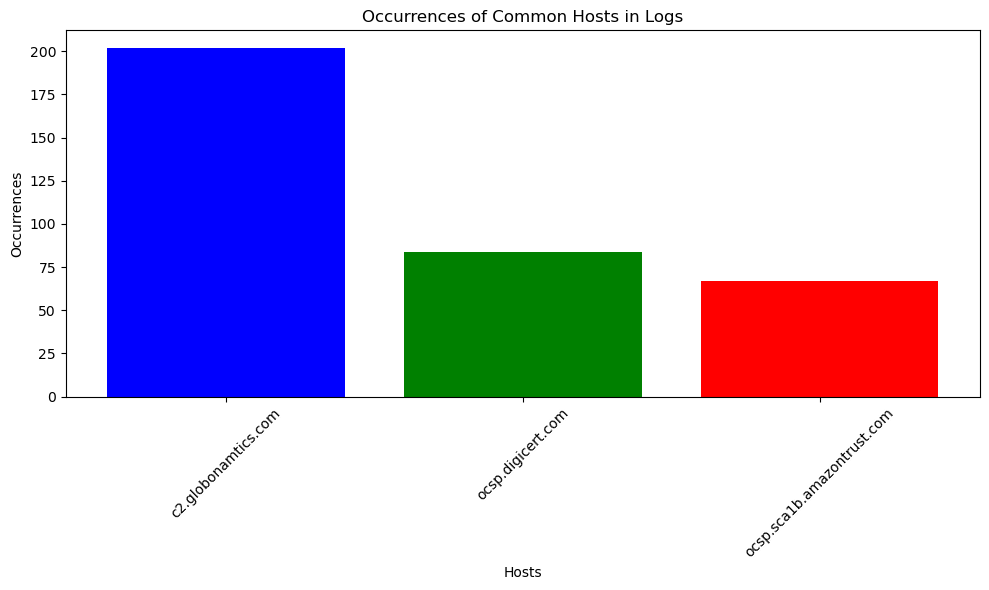

In [110]:
import matplotlib.pyplot as plt

# Host names and their occurrence counts
hosts = ['c2.globonamtics.com', 'ocsp.digicert.com', 'ocsp.sca1b.amazontrust.com']
occurrences = [202, 84, 67]

# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.bar(hosts, occurrences, color=['blue', 'green', 'red'])
plt.title('Occurrences of Common Hosts in Logs')
plt.xlabel('Hosts')
plt.ylabel('Occurrences')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


### Number of Requests per Minute for the Three Most Common Hosts

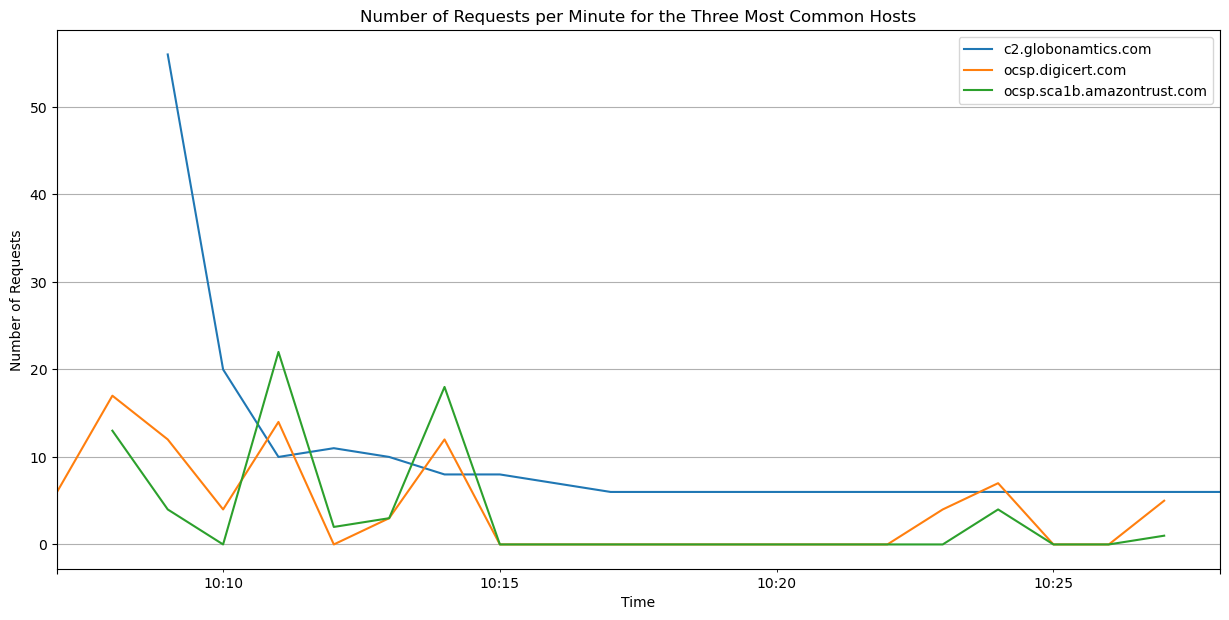

In [116]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming parsed_data_v3 is already defined and contains the necessary data
# Example structure: [{'timestamp': '2022-08-05 10:07:55', 'host': 'example.com', ...}, ...]

# Convert parsed_data_v3 into a DataFrame
df = pd.DataFrame(parsed_data_v3)

# Convert 'timestamp' column to datetime if it's not already
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Identify the three most common hosts
top_hosts = df['host'].value_counts().nlargest(3).index.tolist()

# Filter the DataFrame to include only the top 3 hosts
filtered_df = df[df['host'].isin(top_hosts)]

# Set the timestamp as the index
filtered_df.set_index('timestamp', inplace=True)

# Plotting
plt.figure(figsize=(15, 7))

# Plot each host as a separate line in the time series
for host in top_hosts:
    host_df = filtered_df[filtered_df['host'] == host]
    host_df.resample('T').size().plot(label=host)

plt.title('Number of Requests per Minute for the Three Most Common Hosts')
plt.xlabel('Time')
plt.ylabel('Number of Requests')
plt.legend()
plt.grid(True)
plt.show()


### Number of Requests per Source IP for the Three Most Common Hosts

In [121]:
df['source_ip'].value_counts()

source_ip
192.168.253.154    518
Name: count, dtype: int64

<Figure size 1500x700 with 0 Axes>

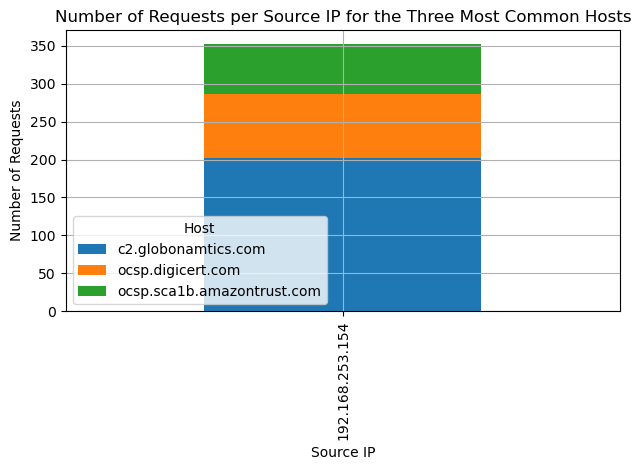

In [117]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming parsed_data_v3 is a list of dictionaries containing the log data
df = pd.DataFrame(parsed_data_v3)

# Identify the three most common hosts
top_hosts = df['host'].value_counts().nlargest(3).index.tolist()

# Filter the DataFrame to include only entries for the top 3 hosts
top_hosts_df = df[df['host'].isin(top_hosts)]

# Aggregate the data by source IP and host
agg_data = top_hosts_df.groupby(['source_ip', 'host']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(15, 7))
agg_data.plot(kind='bar', stacked=True)
plt.title('Number of Requests per Source IP for the Three Most Common Hosts')
plt.xlabel('Source IP')
plt.ylabel('Number of Requests')
plt.legend(title='Host')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


### The End